In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
dfx = pd.read_csv("./Training Data/Diabetes_Xtrain.csv")
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [27]:
dfy = pd.read_csv("./Training Data/Diabetes_Ytrain.csv")
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [28]:
X = dfx.values
Y = dfy.values

In [29]:
print(X.shape)
print(Y.shape)

(576, 8)
(576, 1)


In [30]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [34]:
def knn(x,y,queryPoint,k = 5):
    vals = []
    for i in range(x.shape[0]):
        d = dist(queryPoint,x[i])
        vals.append((d,y[i]))
        
        vals = sorted(vals)
        vals = vals[:k]
        
        vals1 = np.array(vals)
        new_val = np.unique(vals1[:,1],return_counts = True)
        
        index = new_val[1].argmax()
        pred = new_val[0][index]
        
    return pred

In [35]:
t = (pd.read_csv("./Testing Data/Diabetes_Xtest.csv")).values
print(t.shape)

(192, 8)


In [36]:
results = []
for i in range(len(test)):
    p = knn(X,Y,test[i])
    results.append(int(p))
    
print(results)

[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]


In [39]:
zero = 0
one =  0
for i in range(len(results)):
    if(results[i] == 1):
        one += 1
    elif(results[i] == 0):
        zero += 1

In [40]:
print(zero, one)

129 63


In [41]:
isDiabetes = ['Diabetic','Non-Diabetic']
values = [one, zero]

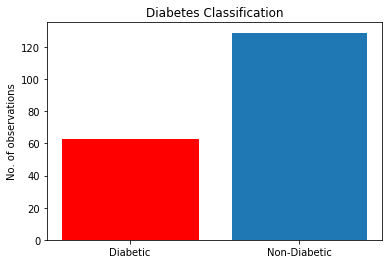

In [45]:
plt.title("Diabetes Classification")
plt.ylabel("No. of observations")
b = plt.bar(isDiabetes, values)
b[0].set_color('r')
plt.show()